<a href="https://colab.research.google.com/github/Nov05/Udactiy-Intel-Edge-AI-Scholarship/blob/master/notebooks/2_12_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# created by nov05 on 2019-12-22

In [0]:
import numpy as np
from matplotlib import pyplot as plt

import requests
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

Dimensions: (1500, 2000, 3)


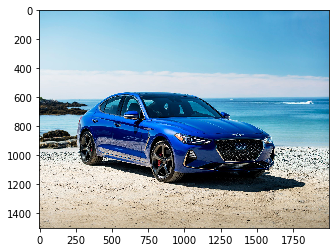

In [0]:
url = "https://media.wired.com/photos/5d09594a62bcb0c9752779d9/master/pass/Transpo_G70_TA-518126.jpg"
response = requests.get(url, stream=True)
img = np.array(Image.open(response.raw), dtype=np.uint8)
print('Dimensions:', img.shape)
plt.imshow(img);
# PIL.Image.open() reads image loads as RGB.

Dimensions: (210, 300, 3)


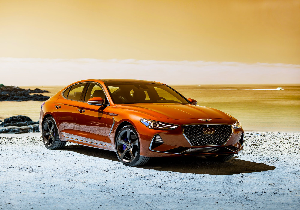

In [0]:
'''
DisabledFunctionError: cv2.imshow() is disabled in Colab, 
because it causes Jupyter sessions to crash; 
see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
    from google.colab.patches import cv2_imshow
'''
img2 = cv2.resize(img, (300, 210))
print('Dimensions:', img2.shape)
cv2_imshow(img2) # cv2.imshow()

# Note that BGR order is used, as the OpenCV function 
# we use to read images loads as BGR, and not RGB.

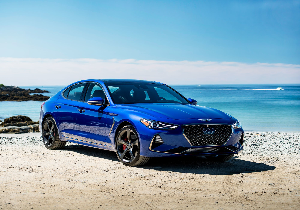

In [0]:
img2 = cv2.resize(img, (300, 210))
# convert BGR to RGB
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
cv2_imshow(img2) # cv2.imshow()

In [0]:
print('Dimensions:', img2.shape)
img3 = img2.transpose((2,1,0))
print('Dimensions:', img3.shape)

Dimensions: (210, 300, 3)
Dimensions: (3, 300, 210)


In [0]:
# e.g. 
# for model text-detection-0004, BCHW = [1x3x768x1280].
# Notice height comes before width.
# http://docs.openvinotoolkit.org/latest/_models_intel_human_pose_estimation_0001_description_human_pose_estimation_0001.html
# http://docs.openvinotoolkit.org/latest/_models_intel_text_detection_0004_description_text_detection_0004.html
# http://docs.openvinotoolkit.org/latest/_models_intel_vehicle_attributes_recognition_barrier_0039_description_vehicle_attributes_recognition_barrier_0039.html

'''
Note that each image is currently loaded as BGR with H, W, C 
order in the test.py file, so any necessary preprocessing to 
change that should occur in your three work files. Note that 
BGR order is used, as the OpenCV function we use to read 
images loads as BGR, and not RGB.
'''

import cv2
import numpy as np


def preprocessing(input_image, height, width):
    '''
    Given an input image, height and width:
    - Resize to height and width
    - Transpose the final "channel" dimension to be first
    - Reshape the image to add a "batch" of 1 at the start 
    '''
    image = cv2.resize(input_image, (width, height))
    image = image.transpose((2,0,1)) # HWC to CHW order
    image = image.reshape(1, 3, height, width)

    return image


def pose_estimation(input_image):
    '''
    Given some input image, preprocess the image so that
    it can be used with the related pose estimation model
    you downloaded previously. You can use cv2.resize()
    to resize the image.
    '''
    preprocessed_image = np.copy(input_image)
    preprocessed_image = preprocessing(preprocessed_image, 256, 456)

    return preprocessed_image


def text_detection(input_image):
    '''
    Given some input image, preprocess the image so that
    it can be used with the related text detection model
    you downloaded previously. You can use cv2.resize()
    to resize the image.
    '''
    preprocessed_image = np.copy(input_image)
    preprocessed_image = preprocessing(preprocessed_image, 768, 1280)

    return preprocessed_image


def car_meta(input_image):
    '''
    Given some input image, preprocess the image so that
    it can be used with the related car metadata model
    you downloaded previously. You can use cv2.resize()
    to resize the image.
    '''
    preprocessed_image = np.copy(input_image)
    preprocessed_image = preprocessing(preprocessed_image, 72, 72)

    return preprocessed_image

In [0]:
## download repo
# !rm -fr /content/Udactiy-Intel-Edge-AI-Scholarship/
# !git clone https://github.com/Nov05/Udactiy-Intel-Edge-AI-Scholarship.git

## download folder of github repo
# !sudo apt-get install subversion
!rm -fr /content/exercise
!svn checkout https://github.com/Nov05/Udactiy-Intel-Edge-AI-Scholarship/trunk/exercise

/content/exercise/001_preprocessing_inputs
(750, 1000, 3)


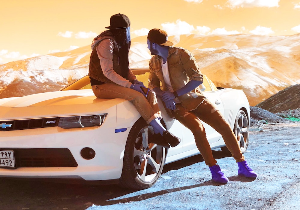

In [0]:
## display test image
%cd /content/exercise/001_preprocessing_inputs
POSE_IMAGE = cv2.imread("../images/sitting-on-car.jpg")
print(POSE_IMAGE.shape)
img = cv2.resize(POSE_IMAGE, (300, 210))
# convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img) # cv2.imshow()

In [0]:
## run test
!python /content/exercise/001_preprocessing_inputs/test.py

Passed Pose Estimation test.
Passed Text Detection test.
Passed Car Meta test.
You passed 3 of 3 tests.
Congratulations!
